## Ocean data exploration

In [1]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

#### Import libraries

In [2]:
from jupyterthemes import jtplot
from src.plot_settings import ps_defaults
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
ps_defaults(use_tex=False, dpi=150)

In [3]:
import os
import xarray as xr
from src.constants import OCEAN_DATA_PATH, OCEAN_PATH, OCEAN_OUTPUT_PATH
import matplotlib.pyplot as plt
xr.set_options(display_style='text')

In [169]:
qflx_old = xr.open_dataarray(OCEAN_DATA_PATH / "qflx.nc", decode_times=False)

### Impliment ingrid

In [170]:
sst_qflx = xr.open_dataset(OCEAN_OUTPUT_PATH / 'om_diag.nc', decode_times=False).SST_QFLX.rename({"L_01":"Z", "T_01": "T", "X_01": "X", "Y_01": "Y"})
lent = len(sst_qflx.coords['T'])
sst_qflx_subset = sst_qflx.isel(T=slice(lent-12, lent+1)).rename('qflx')
sst_qflx_subset.coords['T'] = [x+0.5 for x in range(12)]
sst_qflx_subset.attrs = {'units': 'unitless',
 'file_missing_value': -987654.0,
 'long_name': 'qflx',
 'longname': 'qflx'}
sst_qflx_subset.coords['T'].attrs = {'modulus': 12.0,
 'modulo': 12.0,
 'pointwidth': 1.0,
 'calendar': '360',
 'gridtype': 1,
 'units': 'months since 1960-01-01'}
sst_qflx_subset.coords['Z'].attrs = {'long_name': 'Level', 'gridtype': 0, 'units': 'level'}
sst_qflx_subset.coords['Y'].attrs = {'uniquename': 'Y', 'pointwidth': 1.0, 'gridtype': 0, 'units': 'degree_north'}
sst_qflx_subset.coords['X'].attrs= {'modulus': 360.0,
 'uniquename': 'X',
 'pointwidth': 1.0,
 'gridtype': 1,
 'units': 'degree_east'}
sst_qflx_subset = sst_qflx_subset.interp(Y=np.array(list(range(-90, 91))), X=np.array(list(range(0, 360))), kwargs={"fill_value": 0.0}, method="linear").fillna(0)
sst_qflx_subset = sst_qflx_subset.astype('float32')
sst_qflx_subset.to_netcdf(OCEAN_DATA_PATH / "qflx-3.nc")
print(sst_qflx_subset)

<xarray.DataArray 'qflx' (T: 12, Z: 1, Y: 181, X: 360)>
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
...
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


  

In [166]:
print('new', sst_qflx_subset, '\n\nold', qflx_old)

new <xarray.DataArray 'qflx' (T: 12, Z: 1, Y: 181, X: 360)>
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
...
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


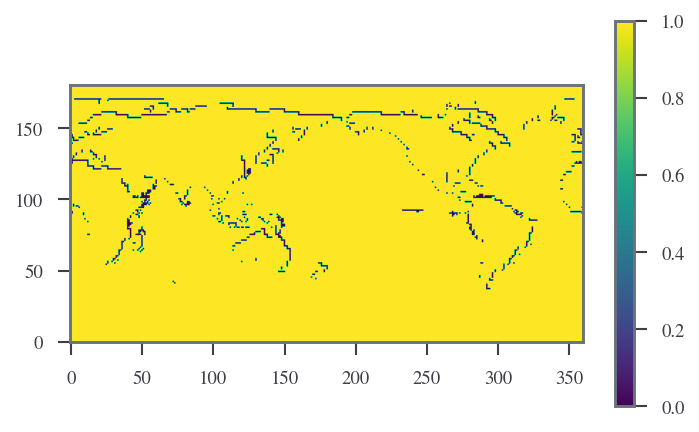

In [168]:
plt.imshow(np.isclose(sst_qflx_subset.isel(T=5, Z=0).values, qflx_old.isel(T=5, Z=0).values, atol=1e-05, equal_nan=True), origin='lower')
plt.colorbar()

In [ ]:
np.all(sst_qflx_subset.isel(T=5).values.ravel() == qflx_old.isel(T=5).values.ravel())

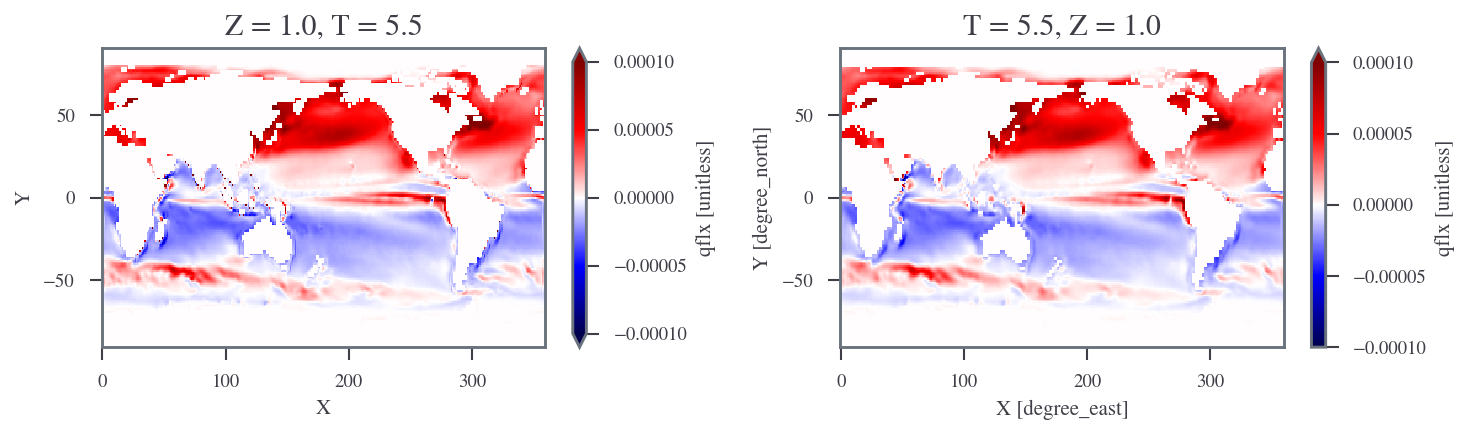

In [172]:
fig, (ax1, ax2) =plt.subplots(1, 2, figsize=(10, 3))
sst_qflx_subset.isel(T=5).plot(ax=ax1, vmin=-1e-4, vmax=1e-4, cmap='seismic')
qflx_old.isel(T=5).plot(ax=ax2, vmin=-1e-4, vmax=1e-4, cmap='seismic')
plt.tight_layout()

```
\begin{ingrid}

(DATA/qflx-0.nc)readCDF .X /XM exch def
(DATA/qflx-0.nc)readCDF .Y /YM exch def

(output/om_diag.nc)readCDF .SST_QFLX
T last 11 sub last RANGE 
T /T (months since 1960-01-01) periodic 0.5 1 11.5 NewEvenGRID replaceGRID
/X X periodic setgridtype def
Y -91 1 91 evengridAverage
0 replaceNaN
L /Z renameGRID
(qflx)rn
(DATA/qflx.nc)writeCDF
\end{ingrid}
```